In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

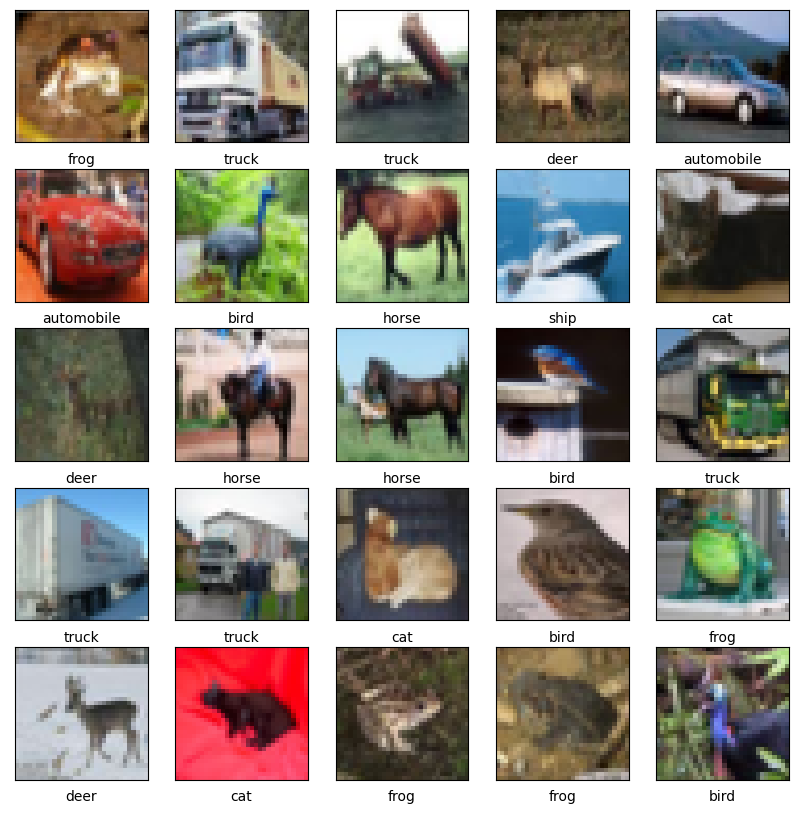

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [5]:
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=8, validation_data=(test_images, test_labels))

Epoch 1/8
1563/1563 [==============================] - 79s 50ms/step - loss: 2.0664 - accuracy: 0.2344 - val_loss: 2.2909 - val_accuracy: 0.2027
Epoch 2/8
1563/1563 [==============================] - 76s 49ms/step - loss: 1.6998 - accuracy: 0.3849 - val_loss: 1.6052 - val_accuracy: 0.4199
Epoch 3/8
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5012 - accuracy: 0.4577 - val_loss: 1.4145 - val_accuracy: 0.4914
Epoch 4/8
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3840 - accuracy: 0.5053 - val_loss: 1.3372 - val_accuracy: 0.5128
Epoch 5/8
1563/1563 [==============================] - 80s 51ms/step - loss: 1.2918 - accuracy: 0.5433 - val_loss: 1.4038 - val_accuracy: 0.4867
Epoch 6/8
1563/1563 [==============================] - 80s 51ms/step - loss: 1.2120 - accuracy: 0.5747 - val_loss: 1.2332 - val_accuracy: 0.5624
Epoch 7/8
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1435 - accuracy: 0.6000 - val_loss: 1.1947 - val_ac

313/313 - 4s - loss: 1.1306 - accuracy: 0.5973
0.5972999930381775


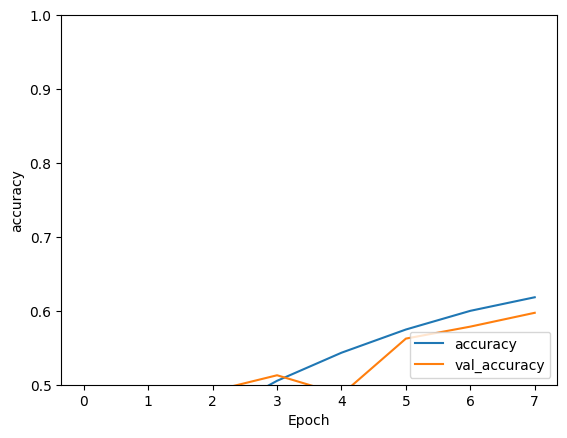

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(test_acc)

     ---------------------------------------- 35.6/35.6 MB 1.5 MB/s eta 0:00:00


In [7]:
import cv2

In [8]:
img = cv2.imread('Truck-image.jpg')

In [9]:
print(img)

[[[210 194 178]
  [209 193 177]
  [210 194 178]
  ...
  [240 224 201]
  [240 224 201]
  [241 223 200]]

 [[210 194 178]
  [208 192 176]
  [209 193 177]
  ...
  [240 224 201]
  [240 224 201]
  [241 223 200]]

 [[210 194 177]
  [207 191 174]
  [207 191 174]
  ...
  [240 223 202]
  [240 223 202]
  [239 222 201]]

 ...

 [[ 46  54  54]
  [ 49  57  57]
  [ 55  63  62]
  ...
  [ 45  55  55]
  [ 44  56  56]
  [ 49  63  62]]

 [[ 43  51  51]
  [ 46  54  54]
  [ 49  57  56]
  ...
  [ 43  53  53]
  [ 44  56  56]
  [ 53  67  66]]

 [[ 37  47  47]
  [ 42  52  52]
  [ 44  55  53]
  ...
  [ 46  56  56]
  [ 47  59  59]
  [ 47  61  60]]]


In [10]:
train_images.shape

(50000, 32, 32, 3)

In [11]:
img = cv2.resize(img, (32, 32))
img.shape




(32, 32, 3)

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)


In [14]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# img_preprocessed = preprocess_input(img_batch)
output = model.predict(img_batch)
classes = np.argmax(output, axis=1)

In [15]:
print(output)

[[1088.6495   1022.5439    -22.603836 -155.69545  -793.74536  -239.96782
  -532.8262     83.417854   16.920246 1072.1117  ]]


In [16]:
print(classes)

[0]


In [17]:
# img = cv2.imread('Truck-image.jpg')

# reshaped_image = img.reshape((-1,3,32,32))
# print(reshaped_image)

# # Convert into Numpy array
# samples_to_predict = np.array( reshaped_image)
# print(samples_to_predict.shape)

# # Generate predictions for samples
# predictions = model.predict(samples_to_predict)
# print(predictions)

# # Generate arg maxes for predictions
# classes = np.argmax(predictions, axis = 1)
# print(classes)

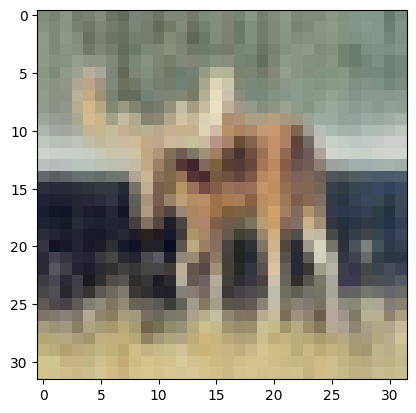

In [18]:

plt.imshow(train_images[28])

In [19]:
from torchvision.datasets import CIFAR10 
import torch

In [9]:
# cifar10_train = CIFAR10(root = r"\Users\Arhamsoft\Desktop\ML Practice", train=True, download = True)
# train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=128, shuffle=True)

# cifar10_test = CIFAR10(root = r"\Users\Arhamsoft\Desktop\ML Practice", train=False, download = True)
# test_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=128, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
from keras.preprocessing.image import ImageDataGenerator
# run the test harness for evaluating a model
def run_test_harness():

 # create data generator
 datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 # prepare iterator
 it_train = datagen.flow(train_images, train_labels, batch_size=64)
 # fit model
 steps = int(train_images.shape[0] / 64)
 history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=5, validation_data=(test_images, test_labels), verbose=0)
 # evaluate model
 _, acc = model.evaluate(test_images, test_labels, verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)

In [29]:
# entry point, run the test harness
run_test_harness()

> 70.860


NameError: name 'summarize_diagnostics' is not defined

In [30]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_images,
    # train_labels,
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    test_images,
    # test_labels,
    batch_size=20,
    class_mode='binary')